In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
df=df.drop(['Kyphosis','Number'],axis=1)

Text(0, 0.5, 'Start')

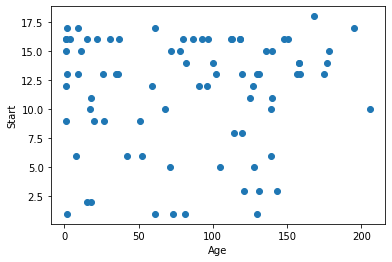

In [ ]:
plt.scatter(df.Age,df['Start'])
plt.xlabel('Age')
plt.ylabel('Start')
# plt.show()

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Start']])
y_predicted

array([2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2,
       1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Age,Start,cluster
0,0.341463,0.235294,2
1,0.765854,0.764706,1
2,0.619512,0.235294,2
3,0.004878,0.000000,2
4,0.000000,0.823529,0


No handles with labels found to put in legend.


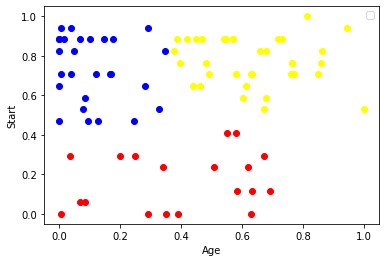

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Start'],color='blue')
plt.scatter(df2.Age,df2['Start'],color='yellow')
plt.scatter(df3.Age,df3['Start'],color='red')
plt.xlabel('Age')
plt.ylabel('Start')
plt.legend()

In [ ]:
# preprocessing using min max scaler
scaler = MinMaxScaler()

scaler.fit(df[['Start']])
df['Start'] = scaler.transform(df[['Start']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

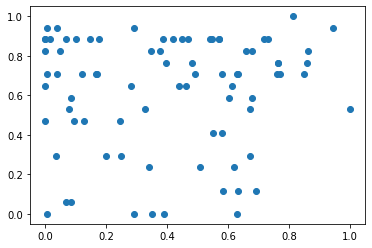

In [ ]:
plt.scatter(df.Age,df['Start'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Start']])
y_predicted

array([2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2,
       1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Age,Start,cluster
0,0.341463,0.235294,2
1,0.765854,0.764706,1
2,0.619512,0.235294,2
3,0.004878,0.000000,2
4,0.000000,0.823529,0


In [ ]:
km.cluster_centers_

array([[0.11020777, 0.73420479],
       [0.63414634, 0.77142857],
       [0.39409499, 0.16718266]])

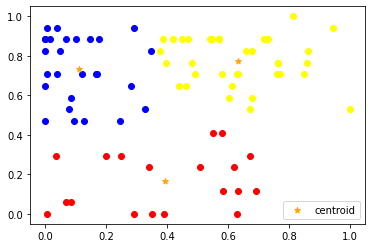

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Start'],color='blue')
plt.scatter(df2.Age,df2['Start'],color='yellow')
plt.scatter(df3.Age,df3['Start'],color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid')
plt.legend()

In [ ]:
# Elbow plot

sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age','Start']])
  sse.append(km.inertia_)

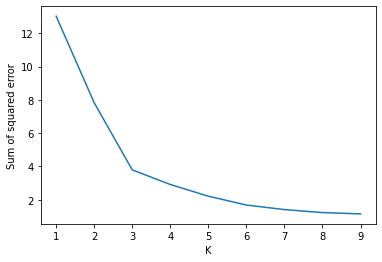

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)